<a href="https://colab.research.google.com/github/LeiRabe/PythonProject/blob/master/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reminder:**

---


Don't forget to import the local data

**Data exploration**

In [80]:
! pip install geopandas

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

     |████████████████████████████████| 1.0MB 6.5MB/s 
     |████████████████████████████████| 6.6MB 10.9MB/s 
     |████████████████████████████████| 15.4MB 182kB/s 


In [81]:
#load the data from local 
happiness_data = pd.read_csv("/content/world-happiness-report-2021.csv")
#shape 149 rows, 20 columns
print(happiness_data.shape)
happiness_data.columns

(149, 20)


Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

## Renommage des columns pour plus de compréhension

1. Logged GDP per capita -> PIB par habitant

**Explication:** Le PIB par habitant est une mesure qui permet de déterminer la production économique d'un pays pour chaque personne qui y vit. Souvent, les nations riches à faible population ont tendance à avoir un PIB par habitant plus élevé. Plus le PIB est élévé, mieux c'est pour le pays (économiquement parlant)

2. social support -> aide social

**Explication:** L'aide sociale est un système de solidarité nationale qui apporte assistance aux personnes confrontées à des difficultés d'ordre social et matériel. *Source: sante.lefigaro.fr*


3. Healthy life expectancy -> Espérance de vie saine

**Explication:** Elle représente la durée de vie moyenne en bonne santé. *Source: insee.fr* 

4. Freedom to make life choices -> Liberté choix de vie

**Explication:** La liberté de faire des choix de vie parle pa elle même.

5. Generosity -> Générosité

**Eplication:** La générosité moyenne des habitants dans le pays.

6. Perceptions of corruption -> Corruption

**Explication:** Perceptions de la corruption sont des indices qui montrent le degré de corruption perçue dans les administrations publiques et la classe politique. *Source: transparency-france.org*

7. Ladder score -> Score 

**Explication:** Score à l'échelle représente le rang, en quelque sorte. Plus le score est élévé, plus le pays est heureux et la contraposé est valable également.


In [82]:
#rename columns based on the indications above
happiness_data=happiness_data.rename(columns=
                                     {"Country name": "country",
                                      "Ladder score": "score", 
                                      "Logged GDP per capita": "PIB par habitant", 
                                      "social support": "aide social", 
                                      "Healthy life expectancy": "Espérance de vie saine", 
                                      "Freedom to make life choices": "Liberté choix de vie", 
                                      "Generosity": "Générosité", 
                                      "Perceptions of corruption": "Corruption"
                                      })
column = happiness_data.columns 
happiness_data = happiness_data[[column[0],column[1],column[2],column[6],column[7],column[8],column[9],column[10],column[11]]]
happiness_data.columns = (happiness_data.columns.str.strip().str.upper()
              .str.replace(' ', '_')
              .str.replace('(', '')
              .str.replace(')', ''))
happiness_data.columns

Index(['COUNTRY', 'REGIONAL_INDICATOR', 'SCORE', 'PIB_PAR_HABITANT',
       'SOCIAL_SUPPORT', 'ESPÉRANCE_DE_VIE_SAINE', 'LIBERTÉ_CHOIX_DE_VIE',
       'GÉNÉROSITÉ', 'CORRUPTION'],
      dtype='object')

In [83]:
#rename countries with -
happiness_data["COUNTRY"] = happiness_data["COUNTRY"].str.strip().str.replace(' ','-')
countries_name = happiness_data["COUNTRY"]
countries_name[:20]

0            Finland
1            Denmark
2        Switzerland
3            Iceland
4        Netherlands
5             Norway
6             Sweden
7         Luxembourg
8        New-Zealand
9            Austria
10         Australia
11            Israel
12           Germany
13            Canada
14           Ireland
15        Costa-Rica
16    United-Kingdom
17    Czech-Republic
18     United-States
19           Belgium
Name: COUNTRY, dtype: object

In [ ]:
#TODO:
# upper case and join with _
# remove unused col
# rename the not renamed

In [84]:
##number of unique countries
countries_nb = happiness_data["COUNTRY"].nunique()
print(countries_nb)

149


**Visualization**
1. Classement des 20 pays les plus plus malheureux en fonction du classement donnée qui se trouve dans la colonne: Ladder score
2. Classement des 20 pays les plus plus heureux en fonction du classement donnée qui se trouve dans la colonne: Ladder score
3. Affichage des 50 pays les plus heureux (dont le Ladder score est élévé) avec un nuage de mot
4. Projection sur une carte du monde la visualisation des continents où se trouve les pays heureux, moyennement heureux et malheureux.

<function matplotlib.pyplot.show>

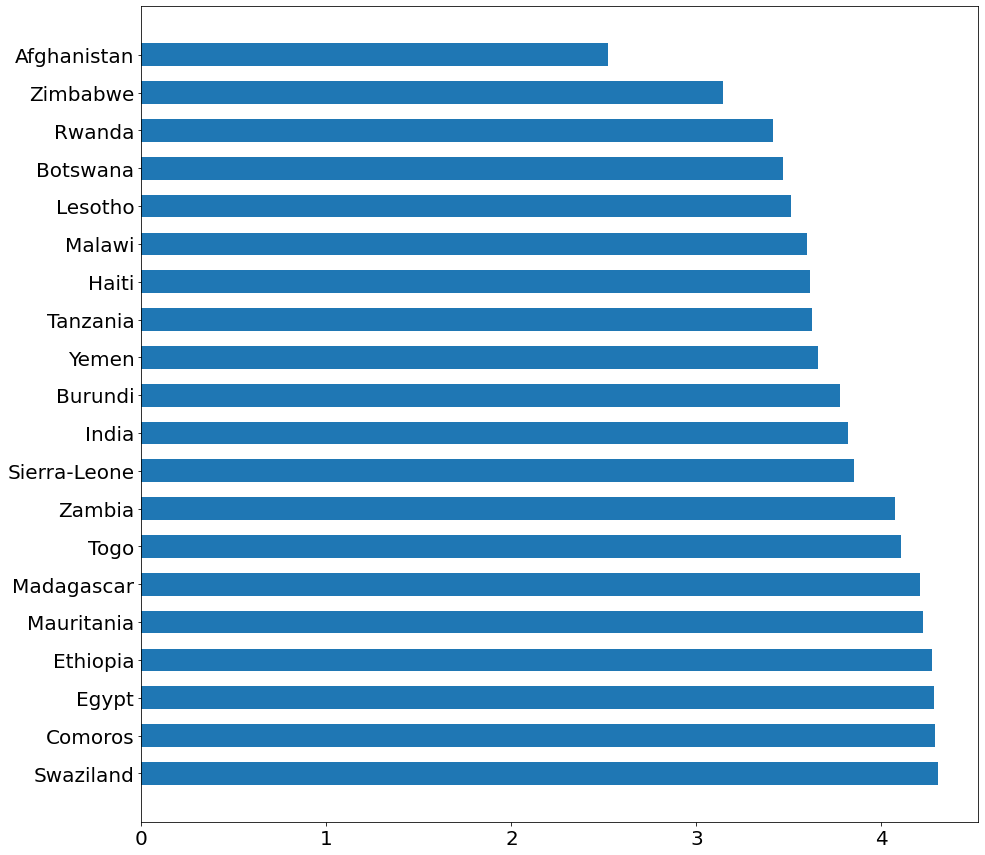

In [85]:
less_happy_countries = np.array(countries_name)[-20:] 
less_happy_countries_score = np.array(happiness_data["SCORE"])[-20:]
plt.figure(figsize=(15,15))
plt.barh(less_happy_countries,less_happy_countries_score,height = 0.6)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 
plt.show
#TODO: change the colors of the bars

<function matplotlib.pyplot.show>

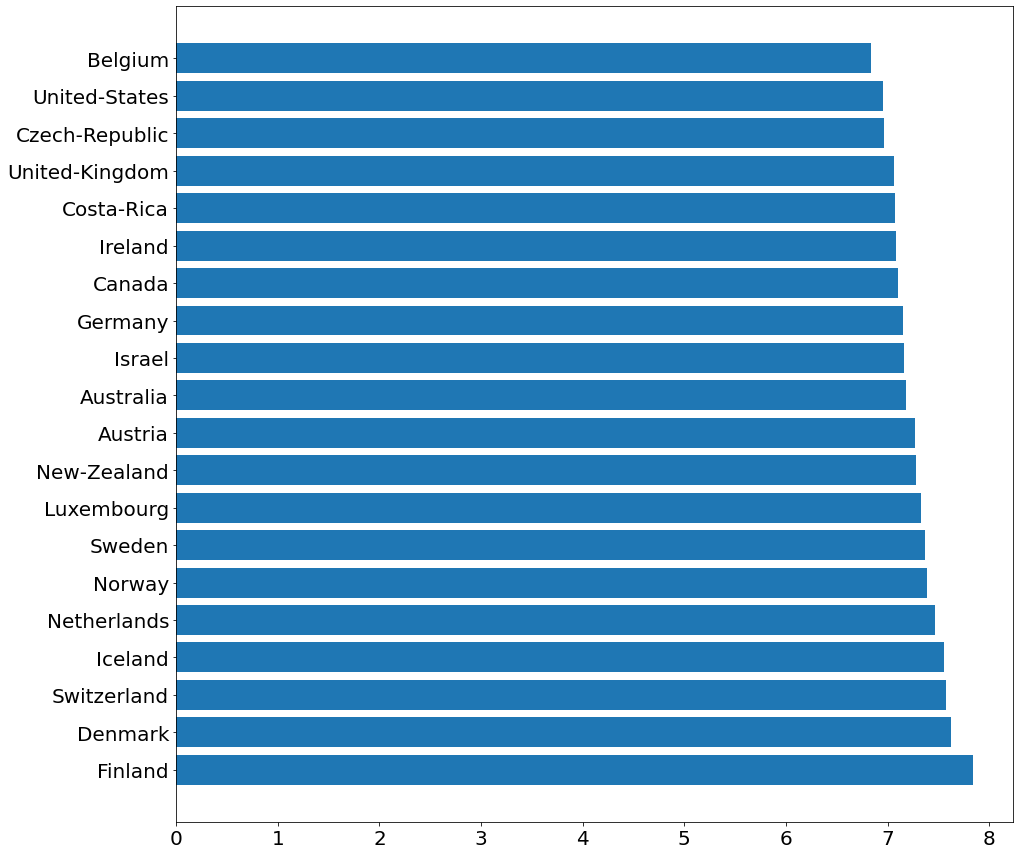

In [100]:
df_countries = pd.DataFrame(happiness_data)
df_countries = df_countries.sort_values("SCORE",ascending=False)
happier_countries = df_countries[:20]
happier_countries_score = np.array(happiness_data["SCORE"])[:20]
plt.figure(figsize=(15,15))
plt.barh("COUNTRY","SCORE",data = happier_countries)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 
plt.show
#TODO: change the colors of the bars
#mettre au bon sens

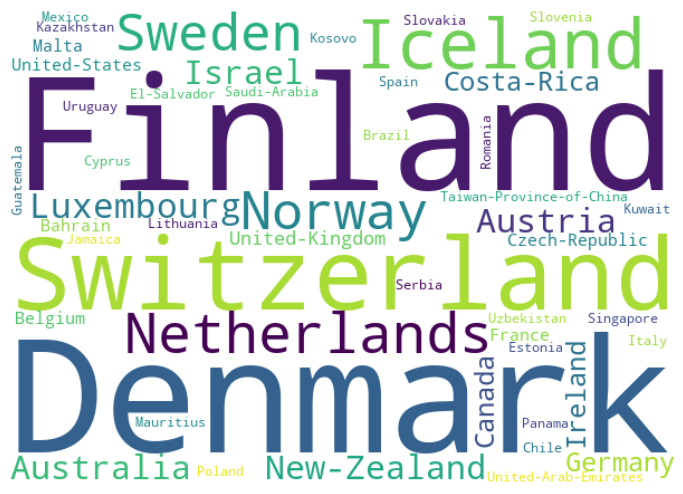

In [88]:
country_display = countries[:50]
plt.subplots(figsize=(12,25))
word_could_dict = Counter(country_display)

word_cloud = WordCloud(background_color='white',
                          width=600,
                          height=430
                         ).generate_from_frequencies(word_could_dict)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()
#TODO: the same but with the less happy ones and with sad colors :c

## Map of happiness repartion

Here is the worldwide vizualization of the happiness. There are some blank spaces due to the fact that the dataset doesn't actually contain all survey from the whole world OR people out there are really sad.

The ladded score are represented by shades of blues, the more it's lighter the less the country is happy. 

It's a global view so that we can see with at a glance the happiness repartition in the world. But we'll go deeper later on. 

([], <a list of 0 Text major ticklabel objects>)

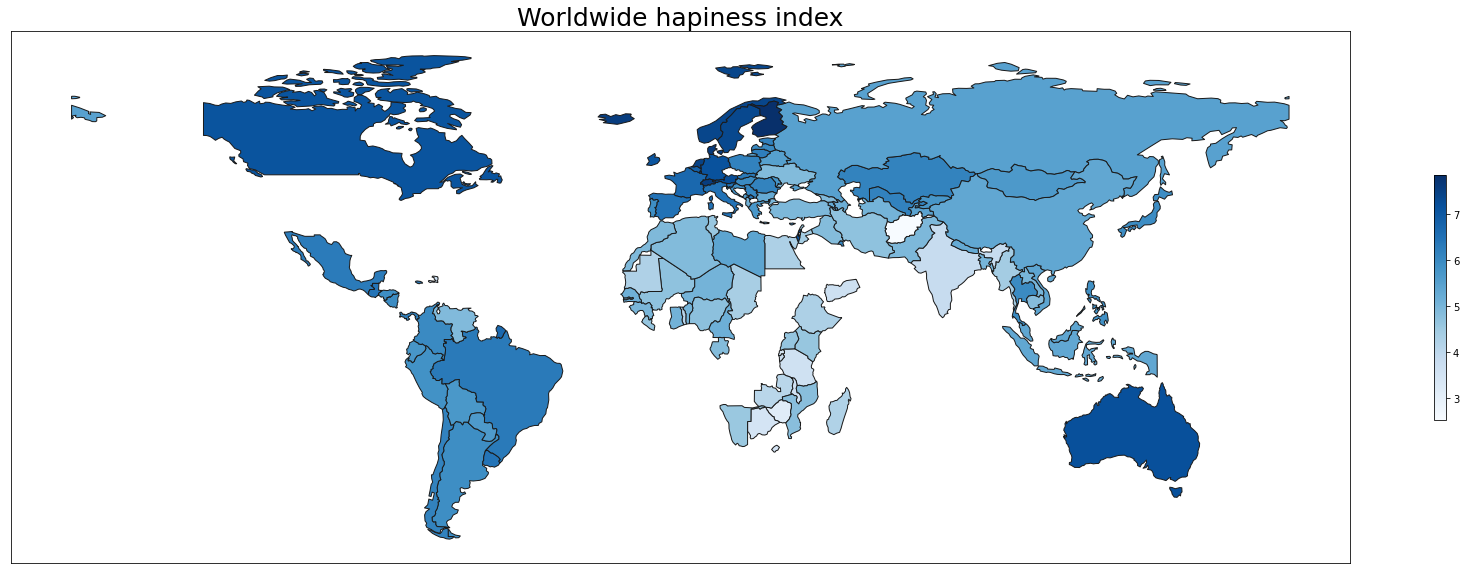

In [98]:
#get the map from the gpd data
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
#merge the values of our dataset with the retrieved map - it works like a SQL JOIN 
map_with_data = pd.merge(map,happiness_data,left_on="name",right_on="COUNTRY")
#we don't need the name from the gpd data because we already have "COUNTRY"
map_with_data = map_with_data.drop(["name"],axis=1)

map_with_data.plot("SCORE","Blues",figsize=(30,15),legend=True,edgecolors="0.1",legend_kwds={"shrink":0.3})
plt.title('Worldwide hapiness index',fontdict={'fontsize':25})
plt.xticks([])
plt.yticks([])